<a href="https://colab.research.google.com/github/Clamepending/KamaroAutonomousRCcar/blob/main/RGBtoDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import UpSampling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.ndimage
import cv2
import random
import pickle
import glob
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Conv2DTranspose

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.5.0


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.version)

Found GPU at: /device:GPU:0
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
pickle_in = open("/content/drive/MyDrive/RGB_and_Depth_Data/PickleData/x_train.pickle", "rb")
x_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/RGB_and_Depth_Data/PickleData/y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/RGB_and_Depth_Data/PickleData/x_test.pickle", "rb")
x_test = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/RGB_and_Depth_Data/PickleData/y_test.pickle", "rb")
y_test = pickle.load(pickle_in)

(2925, 90, 160, 3)


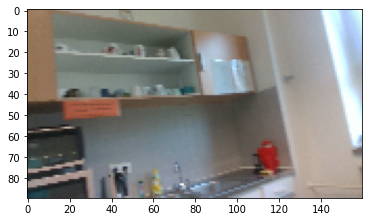

In [ ]:
plt.imshow(x_test[4])
print(x_train.shape)

In [ ]:
#Build the model

model = keras.Sequential()

model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3, 2)))


model.add(Conv2D(128, (5, 5), activation='relu', padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

model.add(UpSampling2D(size=(6, 4)))
# model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))



model.add(Conv2D(1, (1,1), activation='relu')) # squash the filters into 1 layer for 1 image output






model.build(input_shape=(None, 90, 160, 3))

model.summary()

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_787 (Conv2D)          (None, 90, 160, 128)      9728      
_________________________________________________________________
max_pooling2d_264 (MaxPoolin (None, 45, 80, 128)       0         
_________________________________________________________________
conv2d_788 (Conv2D)          (None, 45, 80, 128)       409728    
_________________________________________________________________
conv2d_789 (Conv2D)          (None, 45, 80, 256)       295168    
_________________________________________________________________
dropout_3 (Dropout)          (None, 45, 80, 256)       0         
_________________________________________________________________
conv2d_790 (Conv2D)          (None, 45, 80, 256)       590080    
_________________________________________________________________
max_pooling2d_265 (MaxPoolin (None, 15, 40, 256)    

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test))

Epoch 1/50
92/92 [==============================] - 41s 370ms/step - loss: 5548009.0000 - accuracy: 8.9981e-06 - val_loss: 4117057.5000 - val_accuracy: 0.0000e+00
Epoch 2/50
92/92 [==============================] - 30s 323ms/step - loss: 4358083.0000 - accuracy: 0.0000e+00 - val_loss: 3659958.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
92/92 [==============================] - 30s 323ms/step - loss: 3979924.2500 - accuracy: 0.0000e+00 - val_loss: 3417820.5000 - val_accuracy: 0.0000e+00
Epoch 4/50
92/92 [==============================] - 30s 323ms/step - loss: 4216612.0000 - accuracy: 0.0000e+00 - val_loss: 3559361.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
92/92 [==============================] - 30s 323ms/step - loss: 3838560.5000 - accuracy: 0.0000e+00 - val_loss: 3599665.2500 - val_accuracy: 0.0000e+00
Epoch 6/50
92/92 [==============================] - 30s 323ms/step - loss: 3830819.7500 - accuracy: 0.0000e+00 - val_loss: 3574327.2500 - val_accuracy: 0.0000e+00
Epoch 7/50
92/92 [====

11/11 - 1s - loss: 1735015.0000 - accuracy: 0.0000e+00


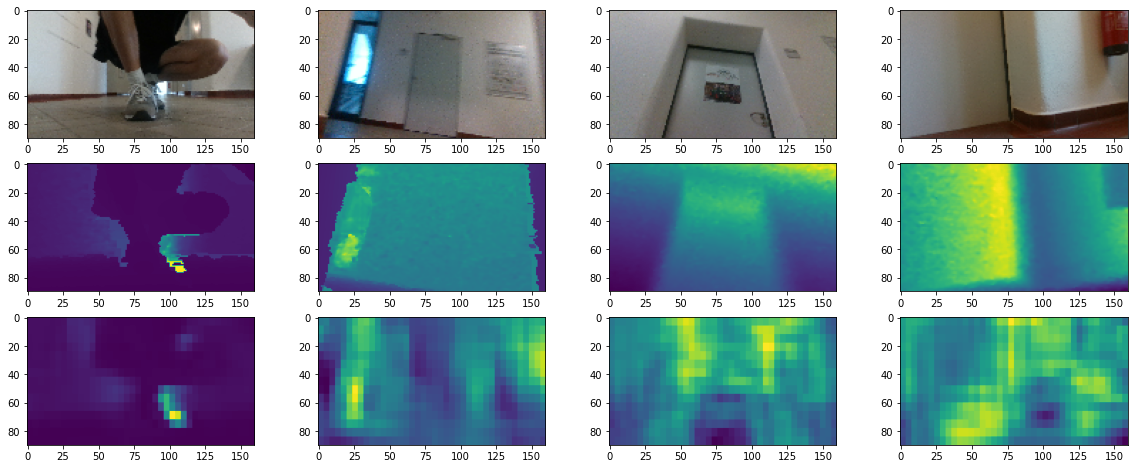

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(3,4,1)
plt.imshow(x_test[10])
plt.subplot(3,4,5)
plt.imshow(y_test[10])
plt.subplot(3,4,9)
plt.imshow(model.predict(x_test)[10,:, :, 0])

plt.subplot(3,4,2)
plt.imshow(x_test[20])
plt.subplot(3,4,6)
plt.imshow(y_test[20])
plt.subplot(3,4,10)
plt.imshow(model.predict(x_test)[20,:, :, 0])

plt.subplot(3,4,3)
plt.imshow(x_test[40])
plt.subplot(3,4,7)
plt.imshow(y_test[40])
plt.subplot(3,4,11)
plt.imshow(model.predict(x_test)[40,:, :, 0])

plt.subplot(3,4,4)
plt.imshow(x_test[50])
plt.subplot(3,4,8)
plt.imshow(y_test[50])
plt.subplot(3,4,12)
plt.imshow(model.predict(x_test)[50,:, :, 0])

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

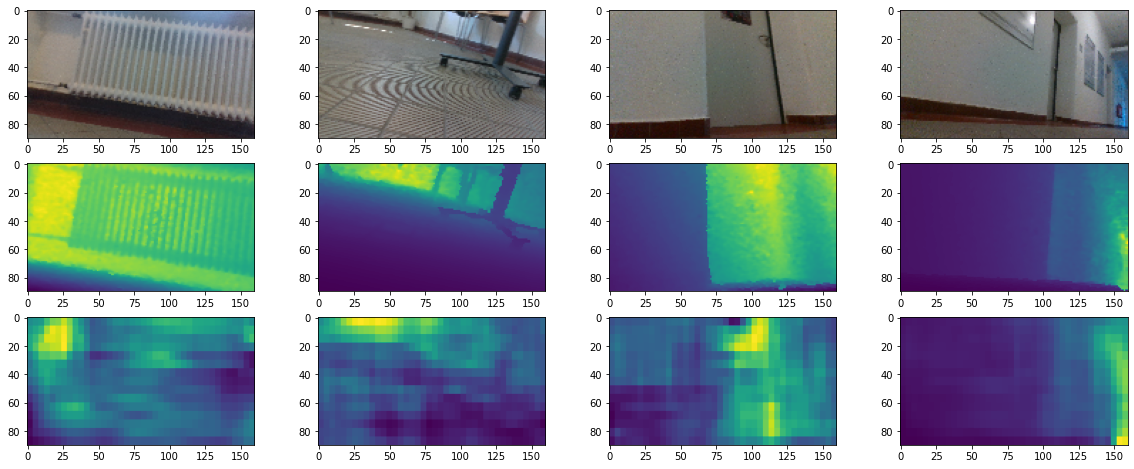

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(3,4,1)
plt.imshow(x_train[10])
plt.subplot(3,4,5)
plt.imshow(y_train[10])
plt.subplot(3,4,9)
plt.imshow(model.predict(x_train)[10,:, :, 0])

plt.subplot(3,4,2)
plt.imshow(x_train[20])
plt.subplot(3,4,6)
plt.imshow(y_train[20])
plt.subplot(3,4,10)
plt.imshow(model.predict(x_train)[20,:, :, 0])

plt.subplot(3,4,3)
plt.imshow(x_train[40])
plt.subplot(3,4,7)
plt.imshow(y_train[40])
plt.subplot(3,4,11)
plt.imshow(model.predict(x_train)[40,:, :, 0])

plt.subplot(3,4,4)
plt.imshow(x_train[50])
plt.subplot(3,4,8)
plt.imshow(y_train[50])
plt.subplot(3,4,12)
plt.imshow(model.predict(x_train)[50,:, :, 0])


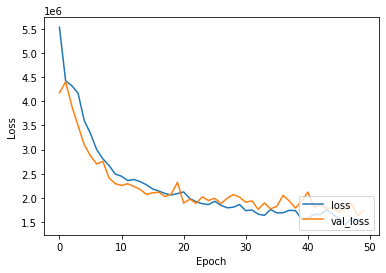

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)